## Import libraries

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import scipy.stats as sp
import collections
import community as community_louvain
import matplotlib.cm as cm
import networkx.algorithms.community as nx_comm

## Import graph

@inproceedings{nr,
     title={The Network Data Repository with Interactive Graph Analytics and Visualization},
     author={Ryan A. Rossi and Nesreen K. Ahmed},
     booktitle={AAAI},
     url={https://networkrepository.com},
     year={2015}
}

In [2]:
G = nx.read_graphml("C:\\Users\\DELL\\Desktop\\prova.graphml")
nx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 5908\nNumber of edges: 41729\nAverage in degree:   7.0631\nAverage out degree:   7.0631'

In [3]:
G.is_directed()

True

In [4]:
G = G.to_undirected()

## Add name to nodes with pandas

In [5]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\fb-pages-politician\\fb-pages-politician.csv",sep=",")
df = df.set_index('new_id')
df.head(5)

,id,name
new_id,,
1661,127397457601670,陳根德
52,169014523134260,林淑芬
3477,295363753921281,Chris White
3193,613631835423903,Stewart Hosie MP
4425,284882801581896,Frank Schäffler


In [6]:
missing = []

for n,data in G.nodes(data=True):
    #print(n,data)
    x = int(data["label"])
    if x in df.index:
        G.nodes[n]["name"] = df["name"][ x ]
    else:
        missing.append(x)
        G.nodes[n]["name"] = "Null"
    

In [7]:
len(missing)

0

In [8]:
nx.write_graphml(G=G,path="C:\\Users\\DELL\\Desktop\\prova1.graphml")

## Import graph with names

In [9]:
G = nx.read_graphml("C:\\Users\\DELL\\Desktop\\prova1.graphml")
G.is_directed()

False

Nodes: blue verified politician Facebook pages 

Network order (N): 5908 

Links: mutual likes among pages 

Network size (L): 41729 

Time of extraction: November 2017 

Type of network: undirected simple network 

## Average degree

In [10]:
degree_list = sorted(list(dict(G.degree()).values()))
print ("avg degree:  ", np.mean(degree_list))

avg degree:   14.126269465132024


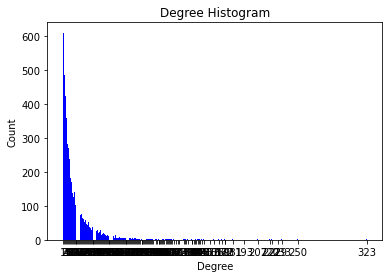

In [11]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.savefig('degree_histogram.png')

In [12]:
print(np.median(degree_list)) 
print(np.std(degree_list))
print(np.max(degree_list))
print(np.min(degree_list))

7.0
20.096019518905567
323
1


Difference between median degree and avg degree since we have hubs

High standard deviation


## Density

In [13]:
nx.density(G)

0.002391445651791438

Low densitiy: common in real networks

## ECDF and ECCDF

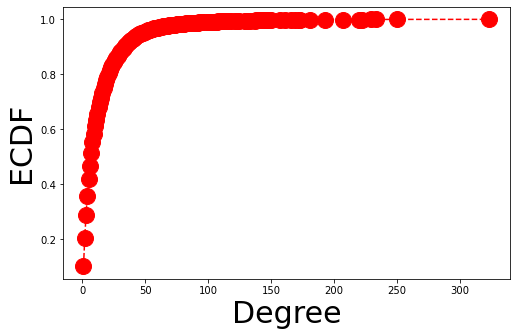

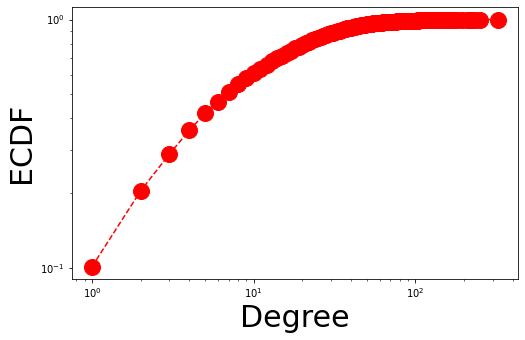

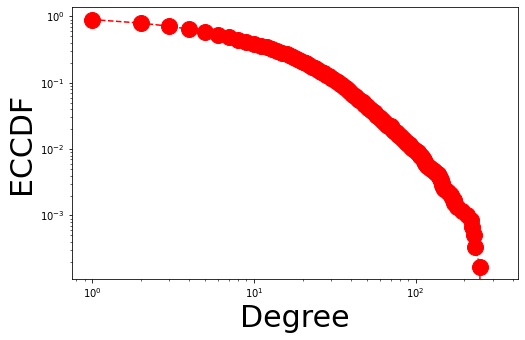

In [14]:
# ECDF in linear scale
cdf_function = ECDF(degree_list)
x = np.unique(degree_list)
y = cdf_function(x)
fig_cdf_function = plt.figure(figsize=(8,5)) 
axes = fig_cdf_function.gca()
axes.plot(x,y,color = 'red', linestyle = '--', marker= 'o',ms = 16)
axes.set_xlabel('Degree',size = 30)
axes.set_ylabel('ECDF',size = 30)
plt.savefig('ECDF.png')

# ECDF in loglog scale
fig_cdf_function = plt.figure(figsize=(8,5))
axes = fig_cdf_function.gca()
axes.loglog(x,y,color = 'red', linestyle = '--', marker= 'o',ms = 16)
axes.set_xlabel('Degree',size = 30)
axes.set_ylabel('ECDF',size = 30)
plt.savefig('ECDFlog.png')

# ECCDF in loglog scale
y = 1-cdf_function(x)
fig_ccdf_function = plt.figure(figsize=(8,5))
axes = fig_ccdf_function.gca()
axes.loglog(x,y,color = 'red', linestyle = '--', marker= 'o',ms = 16)
axes.set_xlabel('Degree',size = 30)
axes.set_ylabel('ECCDF',size = 30)
plt.savefig('ECCDF.png')


Right-skewed distribution with a high variance:
Scale-free network

Substantial curvature exhibited in the distribution on a log-log scale: “strict power-law models are inappropriate for Facebook’s degree distribution” ("The Anatomy of the Facebook Social Graph", Johan Ugander, Brian Karrer, Lars Backstrom, Cameron Marlow)

## Hubs

In [15]:
percentile_99 = np.percentile(degree_list,99)
print(percentile_99)

98.79000000000087


In [16]:
hub_nodi = [k for k,v in dict(G.degree()).items() if v>= percentile_99]
print(hub_nodi)
hub_names= []
for i in hub_nodi:
    i= df["name"][int(i)]
    hub_names.append (i)
print (hub_names)

['98', '3099', '724', '5855', '1965', '641', '2111', '147', '1707', '5867', '2386', '191', '3008', '5882', '3576', '1864', '1474', '4622', '1324', '3541', '4874', '5093', '5800', '4253', '5416', '5871', '1595', '1414', '726', '4081', '4032', '5072', '210', '2770', '837', '2059', '1371', '2698', '112', '2218', '1374', '3281', '1651', '5726', '4602', '4972', '4406', '3617', '3680', '4160', '277', '3595', '5584', '2060', '1429', '873', '5538', '175', '4878', '5797']
['Bill Shorten MP', 'Terri Butler MP', 'Tanya Plibersek', 'Anthony Albanese MP', 'Malcolm Turnbull', 'Marc Serré', 'Michel Picard', 'Marie-Claude Bibeau', 'Michael McLeod', 'Dr. Hedy Fry', 'Pamela Goldsmith-Jones', 'Loïc Hervé', 'Sir Peter Bottomley MP', 'Peter Tauber', 'Angela Merkel', 'Manfred Weber', 'Martin Schulz', 'Achim Post', 'Justin Trudeau', 'Diane Lebouthillier', 'Joachim Herrmann', 'Michelle Rowland MP', 'Barack Obama', 'Daniel Andrews', 'Katarina Barley', 'Johannes Schraps', 'Arno Klare MdB', 'Christian Petry', 'S

## Connected components

In [17]:
print(nx.is_connected(G))
print(nx.number_connected_components(G))

True
1


Very centralized network

## Centrality

In [18]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality=nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality (G)

In [19]:
# lambda function or anonimous function. no name, no return, no def, just use the keyword lambda
# Sintax: lambda argument: manipulate(argument)
hub_degree = sorted(degree_centrality.items(),key = lambda x:x[1], reverse=True)[0]
hub_betweenness = sorted(betweenness_centrality.items(),key = lambda x:x[1], reverse=True)[0]
hub_closeness = sorted(closeness_centrality.items(),key = lambda x:x[1], reverse=True)[0]
hub_eigenvector = sorted(eigenvector_centrality.items(),key = lambda x:x[1], reverse=True)[0]


print('degree:      ',hub_degree, df["name"][int (hub_degree[0])] )
print('betweenness: ',hub_betweenness, df["name"][int (hub_betweenness[0])] )
print('closeness:   ',hub_closeness, df["name"][int (hub_closeness[0])]  )
print('eigenvector:      ',hub_eigenvector, df["name"][int (hub_eigenvector[0])] )

degree:       ('1864', 0.05468088708312172) Manfred Weber
betweenness:  ('5800', 0.2683376978223297) Barack Obama
closeness:    ('5800', 0.35884818662292695) Barack Obama
eigenvector:       ('5416', 0.17410127363429764) Katarina Barley


## Global clustering coefficient and avarage local clustering

In [20]:
print('global clustering coefficient: {}'.format(nx.transitivity(G)))

global clustering coefficient: 0.3010737363311825


In [21]:
print('average local clustering: {}'.format(nx.average_clustering(G)))

average local clustering: 0.385096125793274


In [22]:
# computing point statistics
list_local_clustering=list(nx.clustering(G).values())
print('complete graph - standard deviation local clustering: {}'.format(np.std(list_local_clustering)))

complete graph - standard deviation local clustering: 0.30007827455992286


High global clustering coefficient. Causes:
    
Opportunity (to meet)

Trustability (through the common friend) 

Incentive (latent stress if my friends are not friend with each other)

## Bridges

### Bridges

In [23]:
len([ br for br in nx.bridges(G, root=None)])

649

In [24]:
bridges = list(nx.bridges(G))
name = []
for a,b in bridges: 
    name.append(G.nodes[a]["name"])
    name.append(G.nodes[b]["name"])
nodes = []
for a in name:
    tupla = (a, name.count(a))
    if tupla not in nodes:
        nodes.append (tupla)
# take the second element for sort
def take_second(elem):
    return elem[1]

# sort list with key
print (sorted(nodes, key=take_second,reverse=True))

[('Sir Peter Bottomley MP', 38), ('Barack Obama', 17), ('Loïc Hervé', 12), ('Attorney General Eric Schneiderman', 8), ('Joachim Herrmann', 5), ('Brian A. Joyce', 5), ('Nick Clegg', 5), ('Nicholas Sarwark', 5), ('Manfred Weber', 4), ('Ivan Scalfarotto', 4), ('Aécio Neves', 4), ('Narendra Modi', 4), ('Eduardo Tassano', 4), ('Stefan Grüttner', 4), ('Nicole Langer', 4), ('Hendrik Schmitz', 4), ('Andres Manuel Lopez Obrador', 4), ('Clara López', 4), ('Tan Chuan-Jin', 4), ('Elena Udrea', 4), ('Terri Butler MP', 3), ('Mariano Rajoy Brey', 3), ('Dr Agnieszka Kozłowska-Rajewicz', 3), ('Benjamin Netanyahu - בנימין נתניהו', 3), ('NC Senator Terry Van Duyn', 3), ('Mauricio Macri', 3), ('Astrid Krag', 3), ('Ralph Northam', 3), ('Bryce Reeves', 3), ('Jesse Klaver', 3), ('José Agripino', 3), ('Petr Fiala', 3), ('Uwe Kekeritz', 3), ('Joe Biden', 3), ('MEP Justina Vitkauskaitė Bernard', 3), ('Senator Bill DeSteph', 3), ('Uhuru Kenyatta', 3), ('Jon Hoadley', 3), ('Dr. Legény Zsolt', 3), ('Bill Hightower

In [25]:
nx.set_edge_attributes(G, 0, name="is_bridge")

In [26]:
for br in nx.bridges(G, root=None):
    #print("edge (src,target):", br)
    src,target = br
    G[src][target]['is_bridge'] = 1

### Local bridges

In [27]:
len([ br for br in nx.local_bridges(G, with_span=False, weight=None)])

3443

In [28]:
nx.set_edge_attributes(G, 0, name="is_local_bridge")

In [29]:
for br in nx.local_bridges(G, with_span=False, weight=None):
    #print("edge (src,target, span):", br)
    src, target = br
    
    if G.has_edge(src,target):
        G[src][target]['is_local_bridge'] = 1 
    
    if  G.has_edge(target,src):
        G[target][src]['is_local_bridge'] = 1 

### Almost local bridges

In [30]:
for u,v in G.edges():
    
    neighbors_v = set(G.neighbors(u))
    neighbors_u = set(G.neighbors(v))
    
    den = len( neighbors_v.intersection(neighbors_u) )
    
    num = len( neighbors_v.union(neighbors_u) )
    
    overlap = den/num
    
    G[u][v]['neighborhood_overlap'] = overlap 
    
    #break

In [31]:
nx.write_gexf(G=G,path="bridges.gexf")

## Degree assortativity

In [32]:
nx.degree_assortativity_coefficient(G)

0.0182443427670884

Positive correlation between nodes of similar degree

## Import new graph (only hubs)

In [33]:
G = nx.read_graphml("C:\\Users\\DELL\\Desktop\\prova2.graphml")
nx.info(G)
G.nodes
print (len (G.nodes))

60


## Dataframe with country of origin

In [34]:
x = ['98', '3099', '724', '5855', '1965', '641', '2111', '147', '1707', '5867', '2386', '191', '3008', '5882', '3576', '1864', '1474', '4622', '1324', '3541', '4874', '5093', '5800', '4253', '5416', '5871', '1595', '1414', '726', '4081', '4032', '5072', '210', '2770', '837', '2059', '1371', '2698', '112', '2218', '1374', '3281', '1651', '5726', '4602', '4972', '4406', '3617', '3680', '4160', '277', '3595', '5584', '2060', '1429', '873', '5538', '175', '4878', '5797']
y = ["AU", "AU", "AU","AU", "AU", "CA", "CA", "CA", "CA", "CA", "CA", "FR", "GB", "DE", "DE", "DE","DE","DE","CA", "CA","DE", "AU",  "US", "AU", "DE", "DE", "DE", "DE", "DE", "BG", "DE", "DE", "DE", "DE", "DE", "DE", "DE", "AR", "BR", "BR", "BR", "DE", "DE", "DE", "DE", "DE", "DE","DE","DE","DE","DE","BR", "CA", "CA", "CA", "CA", "CA", "DE", "DE", "DE"]
df = pd.DataFrame(list(zip(x,y)), columns = ['id','State'])
df.head(5)

,id,State
0,98,AU
1,3099,AU
2,724,AU
3,5855,AU
4,1965,AU


## Add state to nodes with pandas

In [35]:
df = df.set_index('id')
missing = []

for n,data in G.nodes(data=True):
    #print(n,data)
    x = data["label"]
    if x in df.index:
        G.nodes[n]["State"] = df["State"][ x ]
    else:
        
        missing.append(x)
        G.nodes[n]["name"] = "Null"
  


In [36]:
len(missing)

0

## Import hubs' graph with states

In [37]:
nx.write_graphml(G=G,path="countries_geo.graphml")
G = nx.read_graphml("countries_geo.graphml")

## Attribute assortativity

In [38]:
nx.attribute_assortativity_coefficient(G, attribute= "State", nodes=None)

0.713134851138354

Strong correlation between nodes from same state

## Add log and lat to nodes with pandas

In [39]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\countries_coordinates.csv",sep="\t")
df = df.set_index('Country Code')
df.head(5)

,Country Name,Capital Name,Capital Latitude,Capital Longitude,Continent Name
Country Code,,,,,
AF,Afghanistan,Kabul,34.516667,69.183333,Asia
AX,Aland Islands,Mariehamn,60.116667,19.900000,Europe
AL,Albania,Tirana,41.316667,19.816667,Europe
DZ,Algeria,Algiers,36.750000,3.050000,Africa
AS,American Samoa,Pago Pago,-14.266667,-170.700000,Australia


In [40]:
missing = []

for n,data in G.nodes(data=True):
    #print(n,data)
    countryname = data["State"]
    if countryname in df.index:
        G.nodes[n]["Lat"] = df["Capital Latitude"][countryname]
        G.nodes[n]["Long"] = df["Capital Longitude"][countryname]
        G.nodes[n]["Continent"] = df["Continent Name"][countryname]
    else:
        missing.append(countryname)
        G.nodes[n]["Lat"] = 0
        G.nodes[n]["Long"] = 0
        G.nodes[n]["Long"] = ""

In [41]:
len(missing)

0

## Import hubs' graph with lon and lat

In [42]:
nx.write_graphml(G=G,path="C:\\Users\\DELL\\Desktop\\hubs.graphml")

## Community detection

In [2]:
G = nx.read_graphml("C:\\Users\\DELL\\Desktop\\prova1.graphml")

### Greedy algorithm

In [3]:
list_community_sets_greedy = list(nx_comm.greedy_modularity_communities(G))

partition_greedy = {}
for i, comm in enumerate(list_community_sets_greedy):
    for n in comm:
        partition_greedy[n]=i

nx.set_node_attributes(G, partition_greedy, "community_nx_greedy")

### Louvain method

In [4]:
partition_library = community_louvain.best_partition(G)
nx.set_node_attributes(G, partition_library, "community_louvain")

## Select highest modularity
Louvian method

In [5]:
comms = set(partition_library.values())
comms

list_community_sets_library = [ set() for i in range(len(comms)) ]

for n, comm in partition_library.items():
    list_community_sets_library[comm].add(n)

list_community_sets_library

method_names = ["Greedy","Louvain library"]

for i,my_list in enumerate([list_community_sets_greedy,  list_community_sets_library]):
    
    print(method_names[i])
    print()
    
    #print("Coverage")
    print("Coverage", nx_comm.coverage(G, my_list))
    #print("Modularity")
    print("Modularity", nx_comm.modularity(G, my_list, weight='weight'))

    
    print("------------------------------------------------------------")
    print()

Greedy

Coverage 0.938771597689856
Modularity 0.8092884368046105
------------------------------------------------------------

Louvain library

Coverage 0.9374056411608234
Modularity 0.8685814318168623
------------------------------------------------------------



In [6]:
comms = set(partition_library.values())
list_community_sets_library = [ set() for i in range(len(comms)) ]
for n, comm in partition_library.items():
    list_community_sets_library[comm].add(n)
pairs = []
for i, nodes in enumerate(list_community_sets_library):
    comm_size = (i,len(nodes))
    pairs.append(comm_size)
community_index = []
number_of_nodes = []

for comm, n_nodes in pairs:
    community_index.append(str(comm))
    number_of_nodes.append(n_nodes)    

Text(0, 0.5, 'Number of nodes')

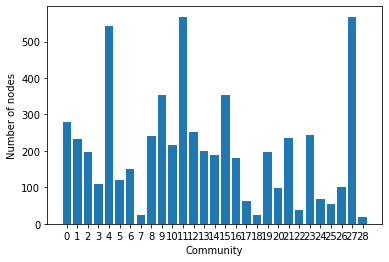

In [7]:
plt.bar(community_index,number_of_nodes)
plt.xlabel("Community")
plt.ylabel("Number of nodes")

In [8]:
graph_name = "community_detection"
nx.write_gexf(G=G,path=f"{graph_name}.gexf")

## Centrality for communities

In [9]:
centr_comm = {}
for comm in list_community_sets_library:
    subgraph = G.subgraph(comm) 
    node_degrees  = nx.degree_centrality(subgraph)
    for n,d in node_degrees.items():
        centr_comm[n] = d
nx.set_node_attributes(G, centr_comm, "centr_comm")

In [10]:
graph_name = "community_detection"
nx.write_gexf(G=G,path=f"{graph_name}.gexf")

## Induced graph

In [11]:
ind = community_louvain.induced_graph(partition_library, G)

In [12]:
nx.write_gexf(G=ind, path=f"community_{graph_name}.gexf")

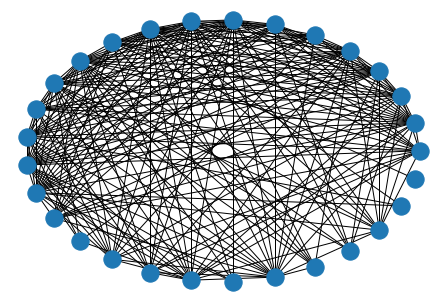

In [13]:
nx.draw_circular(ind)